Code Ref. : https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

In [7]:
import pyforest

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [3]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=42)

In [4]:
type(X)

numpy.ndarray

In [5]:
X[:2,:]

array([[-0.6693561 , -1.49577819, -0.87076638,  1.14183093,  0.02160555,
         1.73062972, -1.25169805,  0.28930464,  0.35716259, -0.19681112,
         0.82927369,  0.15485045, -0.21997009, -0.73913656,  1.80201193,
         1.63460551, -0.93817985, -1.26733697, -1.2763343 ,  1.01664321],
       [ 0.09337237,  0.78584826,  0.10575379,  1.2723535 , -0.84631598,
        -0.97909326,  1.26370668,  0.26402008,  2.41167668, -0.9600463 ,
         0.54347938,  0.19981043,  0.28872366,  0.7324921 , -0.87200205,
        -1.65488744, -1.13020372, -0.12270893,  0.6934308 ,  0.91136272]])

In [6]:
y[:5]

array([1, 0, 1, 1, 0])

In [12]:
print((y == 0).sum())
print((y == 1).sum())

500
500


In [13]:
np.bincount(y)

<IPython.core.display.Javascript object>

array([500, 500], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

([<matplotlib.patches.Wedge at 0x2084467f2b0>,
 [Text(6.735557395310444e-17, 1.1, ''),
  Text(-2.0206672185931328e-16, -1.1, '')])

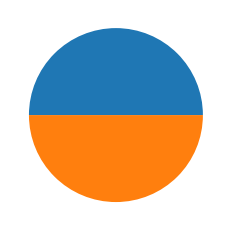

In [14]:
plt.pie(np.bincount(y))

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

([<matplotlib.patches.Wedge at 0x20844533940>,
 [Text(-0.030234095398837705, 1.0995844212589656, ''),
  Text(0.030234198349361356, -1.0995844184282404, '')])

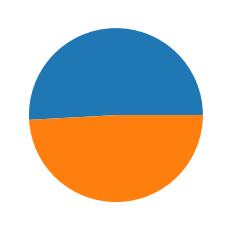

In [16]:
plt.pie(np.bincount(y_train))

## Train Models

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier(n_neighbors=4)

In [19]:
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [20]:
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [26]:
pred_prob1[:2,:]

array([[0.35134901, 0.64865099],
       [0.13227717, 0.86772283]])

In [28]:
pred_prob1[:2,1]

array([0.64865099, 0.86772283])

## roc curve

In [25]:
from sklearn.metrics import roc_curve

In [29]:
#roc_curve fro models
fpr1, tpr1, th1 = roc_curve(y_true=y_test, y_score=pred_prob1[:,1])
fpr2, tpr2, th2 = roc_curve(y_true=y_test, y_score=pred_prob2[:, 1])

In [31]:
random_probs = [0 for i in range(len(y_test))]
len(random_probs)

200

In [32]:
p_fpr, p_tpr, _ = roc_curve(y_true=y_test, y_score=random_probs)

## AUC score can be computed using roc_auc_curve

In [33]:
from sklearn.metrics import roc_auc_score

In [35]:
auc_score1 = roc_auc_score(y_true=y_test, y_score=pred_prob1[:, 1])
auc_score2 = roc_auc_score(y_true=y_test, y_score=pred_prob2[:, 1])

print(auc_score1, auc_score2)

0.9216159179981912 0.8737312832881117


## Plot ROC Curve

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

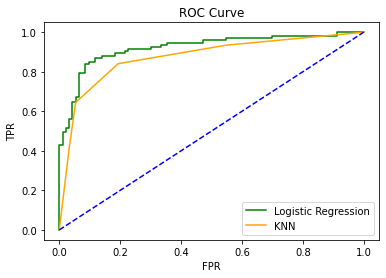

In [40]:
plt.plot(fpr1, tpr1, color='green', label='Logistic Regression')
plt.plot(fpr2, tpr2, color='orange', label='KNN')
plt.plot(p_fpr, p_fpr, linestyle='--', color='blue')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()